In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Métricas de evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
# from plot_metric.functions import BinaryClassification
from sklearn.metrics import roc_curve, auc

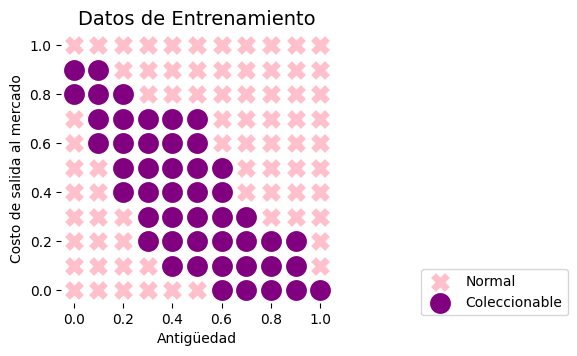

In [ ]:
# Datos de 121 carros -> [Antigüedad, costo de salida al mercado]

X = np.array([[0.0, 1.0], [0.1, 1.0], [0.2, 1.0], [0.3, 1.0], [0.4, 1.0],
              [0.5, 1.0], [0.6, 1.0], [0.7, 1.0], [0.8, 1.0], [0.9, 1.0],
              [1.0, 1.0], [0.0, 0.9], [0.1, 0.9], [0.2, 0.9], [0.3, 0.9],
              [0.4, 0.9], [0.5, 0.9], [0.6, 0.9], [0.7, 0.9], [0.8, 0.9],
              [0.9, 0.9], [1.0, 0.9], [0.0, 0.8], [0.1, 0.8], [0.2, 0.8],
              [0.3, 0.8], [0.4, 0.8], [0.5, 0.8], [0.6, 0.8], [0.7, 0.8],
              [0.8, 0.8], [0.9, 0.8], [1.0, 0.8], [0.0, 0.7], [0.1, 0.7],
              [0.2, 0.7], [0.3, 0.7], [0.4, 0.7], [0.5, 0.7], [0.6, 0.7],
              [0.7, 0.7], [0.8, 0.7], [0.9, 0.7], [1.0, 0.7], [0.0, 0.6],
              [0.1, 0.6], [0.2, 0.6], [0.3, 0.6], [0.4, 0.6], [0.5, 0.6],
              [0.6, 0.6], [0.7, 0.6], [0.8, 0.6], [0.9, 0.6], [1.0, 0.6],
              [0.0, 0.5], [0.1, 0.5], [0.2, 0.5], [0.3, 0.5], [0.4, 0.5],
              [0.5, 0.5], [0.6, 0.5], [0.7, 0.5], [0.8, 0.5], [0.9, 0.5],
              [1.0, 0.5], [0.0, 0.4], [0.1, 0.4], [0.2, 0.4], [0.3, 0.4],
              [0.4, 0.4], [0.5, 0.4], [0.6, 0.4], [0.7, 0.4], [0.8, 0.4],
              [0.9, 0.4], [1.0, 0.4], [0.0, 0.3], [0.1, 0.3], [0.2, 0.3],
              [0.3, 0.3], [0.4, 0.3], [0.5, 0.3], [0.6, 0.3], [0.7, 0.3],
              [0.8, 0.3], [0.9, 0.3], [1.0, 0.3], [0.0, 0.2], [0.1, 0.2],
              [0.2, 0.2], [0.3, 0.2], [0.4, 0.2], [0.5, 0.2], [0.6, 0.2],
              [0.7, 0.2], [0.8, 0.2], [0.9, 0.2], [1.0, 0.2], [0.0, 0.1],
              [0.1, 0.1], [0.2, 0.1], [0.3, 0.1], [0.4, 0.1], [0.5, 0.1],
              [0.6, 0.1], [0.7, 0.1], [0.8, 0.1], [0.9, 0.1], [1.0, 0.1],
              [0.0, 0.0], [0.1, 0.0], [0.2, 0.0], [0.3, 0.0], [0.4, 0.0],
              [0.5, 0.0], [0.6, 0.0], [0.7, 0.0], [0.8, 0.0], [0.9, 0.0],
              [1.0, 0.0]])

# 0 : normal    1 : coleccionable

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
              0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
              0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
              0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
              0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
              0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
              0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
              0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Gráfica de dispersión
plt.figure(figsize=(3.5, 3.5))
plt.title("Datos de Entrenamiento", fontsize=14)
plt.scatter(X[y == 0].T[0], X[y == 0].T[1],
            marker="x", s=100, color="pink", linewidths=5, label="Normal")
plt.scatter(X[y == 1].T[0], X[y == 1].T[1],
            marker="o", s=100, color="purple", linewidths=5, label="Coleccionable")
plt.xlabel("Antigüedad", fontsize=10)
plt.ylabel("Costo de salida al mercado", fontsize=10)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))
plt.show()

In [ ]:
serie = pd.Series(y)
print(serie.value_counts())

0    73
1    48
Name: count, dtype: int64


In [ ]:
print(X[y==0].T)

[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.2 0.3 0.4 0.5 0.6 0.7 0.8
  0.9 1.  0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.  0.6 0.7 0.8 0.9 1.  0.  0.6
  0.7 0.8 0.9 1.  0.  0.1 0.7 0.8 0.9 1.  0.  0.1 0.7 0.8 0.9 1.  0.  0.1
  0.2 0.8 0.9 1.  0.  0.1 0.2 1.  0.  0.1 0.2 0.3 1.  0.  0.1 0.2 0.3 0.4
  0.5]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.7 0.7 0.7 0.7 0.7 0.7 0.6 0.6
  0.6 0.6 0.6 0.6 0.5 0.5 0.5 0.5 0.5 0.5 0.4 0.4 0.4 0.4 0.4 0.4 0.3 0.3
  0.3 0.3 0.3 0.3 0.2 0.2 0.2 0.2 0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.
  0. ]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
def metricas(y_predict,y_test):
  print("Accuracy:",accuracy_score(y_predict,y_test))
  print("Precision:",precision_score(y_predict,y_test))
  print("Recall:",recall_score(y_predict,y_test))

In [ ]:
def curva_roc(y_real, y_pred):
  fpr, tpr, thresholds = roc_curve(y_real, y_pred)
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
  plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal para referencia
  plt.xlabel('Tasa Falsos Positivos')
  plt.ylabel('Tasa verdaderos positivos')
  plt.title('CURVA ROC')
  plt.legend(loc='lower right')
  plt.show()

##Regresión Logistica

In [ ]:
rl = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predict = rl.predict(X_test)
print(y_predict)
print(y_test)
print(rl.get_params(deep=False))


[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0
 0 1 0]
[0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0]
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Accuracy: 0.65
Precision: 0.38461538461538464
Recall: 0.45454545454545453


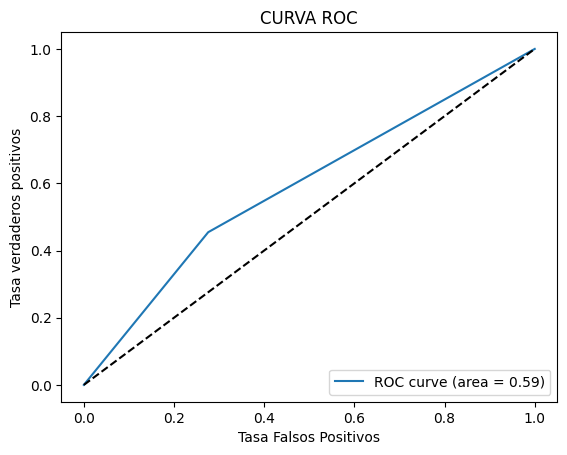

In [ ]:
metricas(y_predict,y_test)
curva_roc(y_predict,y_test)

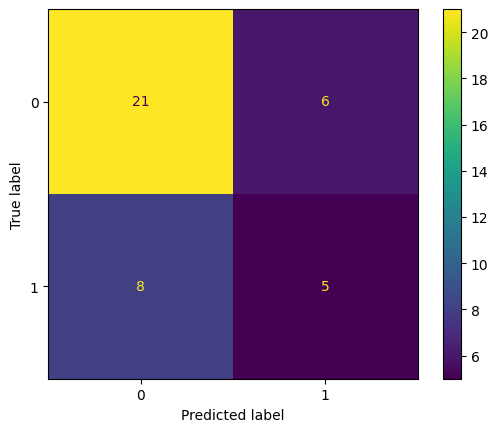

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_predict))
cmd.plot()

##Arbol de desición

In [ ]:
dtc = DecisionTreeClassifier(random_state=0,max_depth=5).fit(X_train, y_train)
y_predict = dtc.predict(X_test)
print(y_predict)
print(y_test)



[0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0
 0 1 0]
[0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0]


[Text(0.6875, 0.9166666666666666, 'x[1] <= 0.75\ngini = 0.491\nsamples = 81\nvalue = [46, 35]'),
 Text(0.4659090909090909, 0.75, 'x[0] <= 0.75\ngini = 0.493\nsamples = 61\nvalue = [27, 34]'),
 Text(0.5767045454545454, 0.8333333333333333, 'True  '),
 Text(0.25, 0.5833333333333334, 'x[0] <= 0.15\ngini = 0.449\nsamples = 47\nvalue = [16.0, 31.0]'),
 Text(0.09090909090909091, 0.4166666666666667, 'x[1] <= 0.55\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.045454545454545456, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.13636363636363635, 0.25, 'x[0] <= 0.05\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.09090909090909091, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.18181818181818182, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4090909090909091, 0.4166666666666667, 'x[1] <= 0.15\ngini = 0.355\nsamples = 39\nvalue = [9, 30]'),
 Text(0.3181818181818182, 0.25, 'x[0] <= 0.35\ngini = 0.5\nsamples = 10\nvalue = [5,

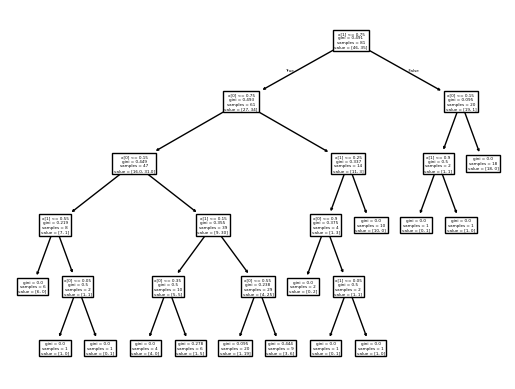

In [ ]:
from sklearn import tree
tree.plot_tree(dtc)

In [2]:
metricas(y_predict,y_test)
curva_roc(y_predict,y_test)

NameError: name 'metricas' is not defined

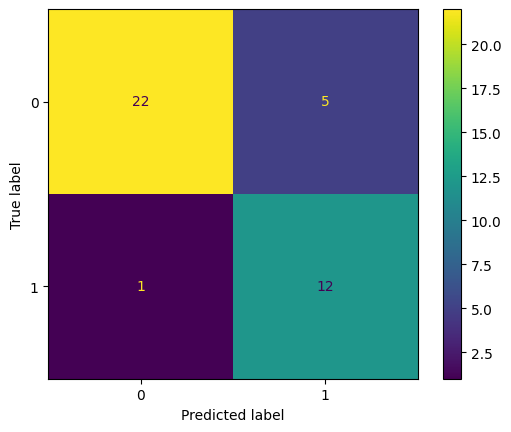

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_predict))
cmd.plot()

##Maquina de soporte vectorial

In [ ]:
svc = SVC().fit(X_train, y_train)
y_predict = svc.predict(X_test)
print(y_predict)
print(y_test)
#print(str(type(svc.__name__)))

[0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0]
[0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0]


In [ ]:
#print((type(rf).__name__))

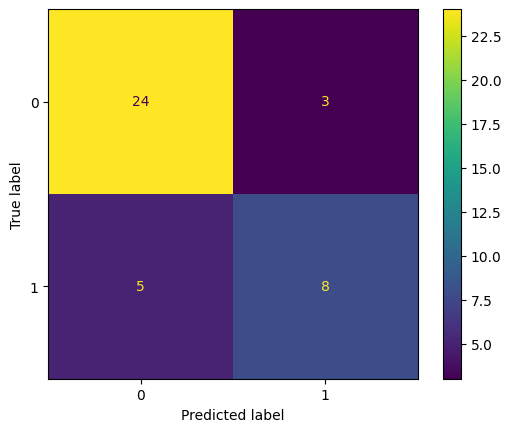

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_predict))
cmd.plot()

Accuracy: 0.8
Precision: 0.6153846153846154
Recall: 0.7272727272727273


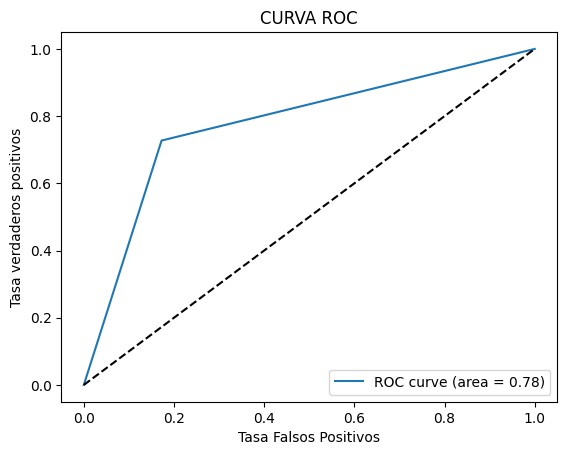

In [ ]:
metricas(y_predict,y_test)
curva_roc(y_predict,y_test)

##Bosque aleatorios

In [ ]:
rf = RandomForestClassifier(random_state=0,max_depth=2).fit(X_train, y_train)
y_predict = rf.predict(X_test)
print(y_predict)
print(y_test)

[0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0]
[0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0]


Accuracy: 0.65
Precision: 0.3076923076923077
Recall: 0.4444444444444444


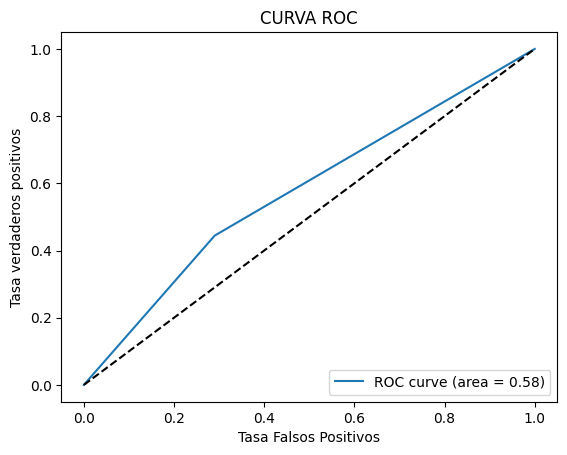

In [ ]:
metricas(y_predict,y_test)
curva_roc(y_predict,y_test)

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    VotingRegressor,
)
from sklearn.linear_model import LinearRegression

In [ ]:
X, y = load_diabetes(return_X_y=True)

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X, y)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [ ]:
xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)
print(pred1)
print(pred2)
print(pred3)
print(pred4)

[200.87337372  81.69334233 160.56341968 204.29374265 110.72012178
 117.87326017  79.46599589  97.71929352 121.90775688 243.35292997
 108.05821303  93.92705222 104.67891319 168.8852067  102.4498724
 171.78909029 185.06486217 183.49516369 130.02571735 111.70779374]
[180.25  76.06 155.07 199.9  119.05 101.41 117.26  98.56 120.72 263.99
 102.32 105.91 150.67 177.79 112.22 179.49 185.95 156.78 105.96 140.65]
[206.11667725  68.07103297 176.88279035 166.91445843 128.46225834
 106.35191443  73.89134662 118.85423042 158.80889721 213.58462442
  97.07481511  95.10108423 115.06915952 164.67656842 103.07814257
 177.17487964 211.7570922  182.84134823 148.00326937 124.01754066]
[195.74668365  75.27479177 164.17207001 190.36940036 119.41079337
 108.5450582   90.20578083 105.04450798 133.81221803 240.3091848
 102.48434272  98.31271215 123.4726909  170.45059171 105.91600499
 176.15132331 194.25731812 174.37217064 127.99632891 125.4584448 ]


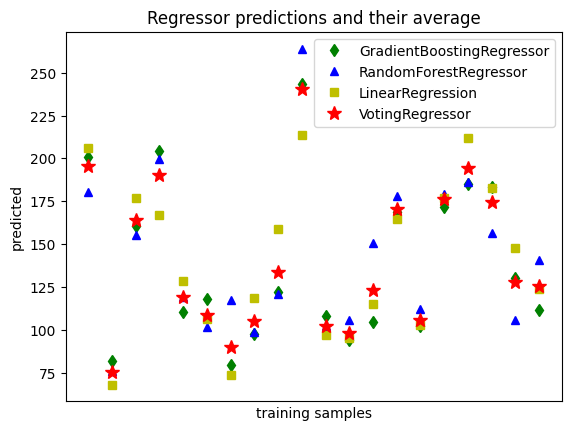

In [ ]:
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()